In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as st
import os

In [2]:
#Load data into df from csv

city_data_df=pd.read_csv("Resources\city_data.csv")
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
path_ride=os.path.join("Resources","ride_data.csv")
#ride_data_df=pd.read_csv("Resources\ride_data.csv")
ride_data_df=pd.read_csv(path_ride)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
#get all rows from city_data_df that are not null
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [5]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#get the datatypes
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
#get unique values from the type column
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(city_data_df["type"]=="Urban")

66

In [9]:
sum(city_data_df["type"]=="Rural")

18

In [10]:
sum(city_data_df["type"]=="Suburban")

36

In [11]:
#get all null values from ride_data_df 

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
#merge both data frames
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
#Create 3 different df for each city type(urban, rural, suburban)

urban_cities_df=pyber_data_df[pyber_data_df['type']=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
rural_cities_df=pyber_data_df[pyber_data_df['type']=="Rural"]

suburban_cities_df=pyber_data_df[pyber_data_df['type']=="Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [17]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
#get average fare per city(y axis)

urban_average_fare=urban_cities_df.groupby('city').mean()['fare']
rural_average_fare=rural_cities_df.groupby('city').mean()['fare']
suburban_average_fare=suburban_cities_df.groupby('city').mean()['fare']
rural_average_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [19]:
#total no of rides per city(X axis)
urban_ride_count=urban_cities_df.groupby('city').count()["ride_id"]
rural_ride_count=rural_cities_df.groupby('city').count()["ride_id"]
suburban_ride_count=suburban_cities_df.groupby('city').count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [20]:
#average no of drivers per city (size of markers)

urban_average_drivers=urban_cities_df.groupby('city').mean()['driver_count']
rural_average_drivers=rural_cities_df.groupby('city').mean()['driver_count']
suburban_average_drivers=suburban_cities_df.groupby('city').mean()['driver_count']
suburban_average_drivers.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

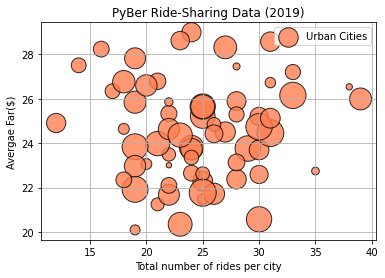

In [21]:
#Scatter plot for Urban type of cities
#plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,urban_average_fare, s=10 * urban_average_drivers, color="coral", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Urban Cities")

plt.xlabel("Total number of rides per city")
plt.ylabel("Avergae Far($)")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

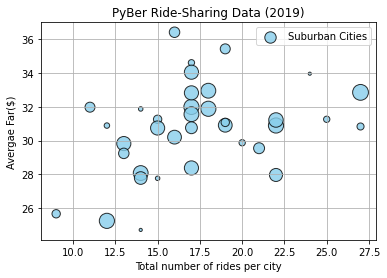

In [22]:
#Scatter plot for Subarban type of cities

plt.scatter(suburban_ride_count,suburban_average_fare, s=10*suburban_average_drivers, color="skyblue", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Suburban Cities")

plt.xlabel("Total number of rides per city")
plt.ylabel("Avergae Far($)")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

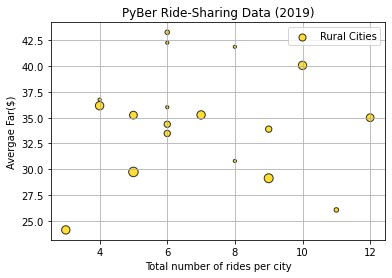

In [23]:
#Scatter plot for Rural type of cities

plt.scatter(rural_ride_count,rural_average_fare, s=10*rural_average_drivers, color="gold", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Rural Cities")

plt.xlabel("Total number of rides per city")
plt.ylabel("Avergae Far($)")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

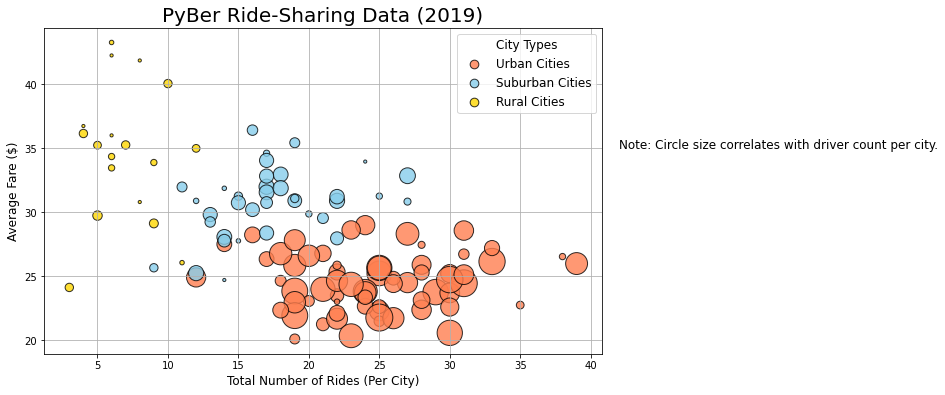

<Figure size 432x288 with 0 Axes>

In [24]:
#Scatter plot for Urban type of cities
#plt.subplots(figsize=(10, 6))
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,urban_average_fare, s=10 * urban_average_drivers, color="coral", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Urban Cities")


#Scatter plot for Suburban type of cities
plt.scatter(suburban_ride_count,suburban_average_fare, s=10*suburban_average_drivers, color="skyblue", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Suburban Cities")




#Scatter plot for Rural type of cities
plt.scatter(rural_ride_count,rural_average_fare, s=10*rural_average_drivers, color="gold", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Rural Cities")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#Create a legend
lgnd=plt.legend(fontsize="12",mode="Expanded",scatterpoints=1, loc="best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

# Save the figure.
plt.savefig("analysis\Fig1.png")


In [25]:
#get summary statictics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [26]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [27]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [28]:
#Summary statistics for the ride count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [29]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [30]:
rural_ride_count.describe()


count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [31]:
#Get the mean of the ride count for each city type

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2),

(24.62, 17.36, 6.94)

In [32]:
#get the median no of rides in urban city
round(urban_ride_count.median())

24

In [33]:
#get the mode no of rides in urban city
round(urban_ride_count.mode())

0    22
1    25
dtype: int64

In [34]:
round(suburban_ride_count.mode())

0    17
dtype: int64

In [35]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [36]:
#Calculate measures of central tendancy for the no of ride counts for all the type of cities
mean_urban_ride_counts=np.mean(urban_ride_count)

In [37]:
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_counts:.2f}.")

The mean for the ride counts for urban trips is 24.62.


In [38]:
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [39]:
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [40]:
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [41]:
#summary statistics for avergae fair for each city type
urban_fare= urban_cities_df['fare']

#urban_cities_df['fare']
mean_urban_fare=np.mean(urban_fare)

print(f"The mean fare price for urban trips is ${mean_urban_fare:.2f}.")


The mean fare price for urban trips is $24.53.


In [42]:
median_urban_fare=np.median(urban_cities_df['fare'])

print(f"The median fare price for urban trips is ${median_urban_fare:.2f}.")

The median fare price for urban trips is $24.64.


In [43]:
mode_urban_fare=sts.mode(urban_cities_df['fare'])
print(f"The mode fare price for urban trips is {mode_urban_fare}.")

The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [44]:
#for rural and suburban
mean_rural_fare=np.mean(rural_cities_df['fare'])

print(f"The mean fare price for rural trips is ${mean_rural_fare:.2f}.")

The mean fare price for rural trips is $34.62.


In [45]:
mean_suburban_fare=np.mean(suburban_cities_df['fare'])

print(f"The mean fare price for suburban trips is ${mean_suburban_fare:.2f}.")

The mean fare price for suburban trips is $30.97.


In [46]:
#Mean, median and mode : driver counts for all types of cities
mean_urban_driverCount = np.mean(urban_cities_df['driver_count'])
median_urban_driverCount = np.median(urban_cities_df['driver_count'])
mode_urban_driverCount = sts.mode(urban_cities_df['driver_count'])

In [47]:
#Mean, median and mode : driver counts for all types of cities
mean_suburban_driverCount = np.mean(suburban_cities_df['driver_count'])
print(mean_suburban_driverCount)
median_suburban_driverCount = np.median(suburban_cities_df['driver_count'])
mode_suburban_driverCount = sts.mode(suburban_cities_df['driver_count'])

13.712


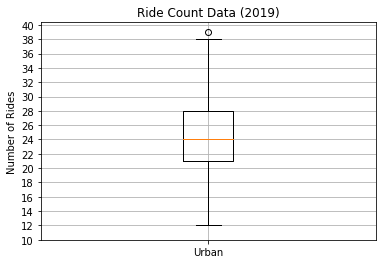

In [48]:
#Box and whisker plot for ride count data(urban cities)
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

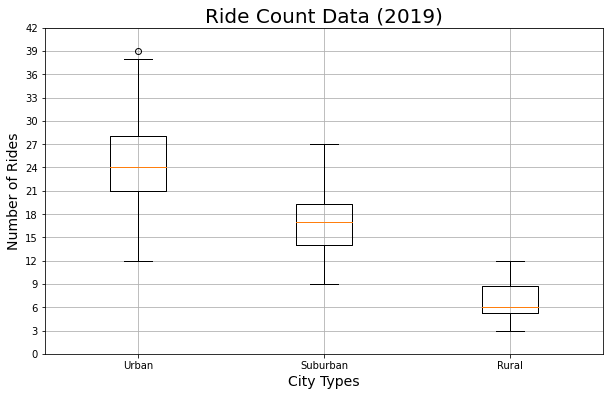

In [49]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [50]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39]
print(f"{urban_city_outlier} has the highest rider count.")

city
West Angela    39
Name: ride_id, dtype: int64 has the highest rider count.


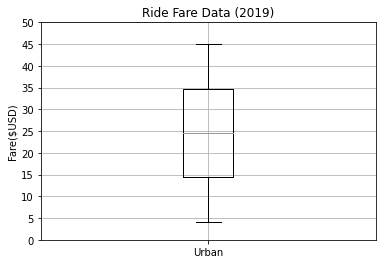

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [51]:

# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fare, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fare.describe()

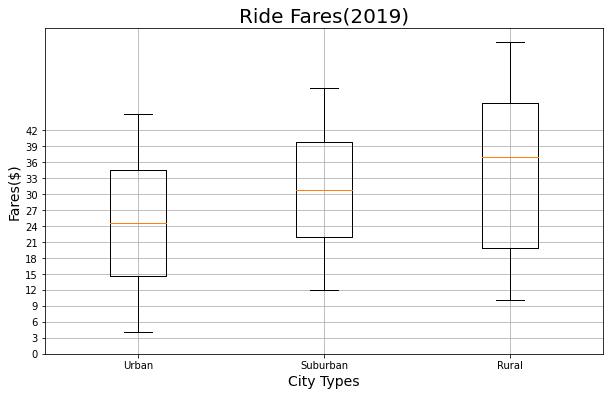

In [52]:
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fare, suburban_cities_df['fare'], rural_cities_df['fare']]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fares(2019)',fontsize=20)
ax.set_ylabel('Fares($)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

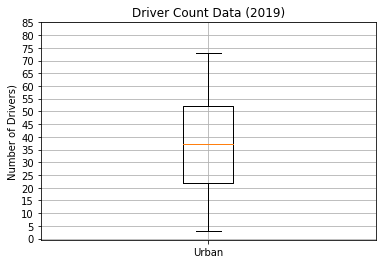

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [53]:
#box and whisker plot for urban driver count data 


x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_cities_df['driver_count'],labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_cities_df['driver_count'].describe()

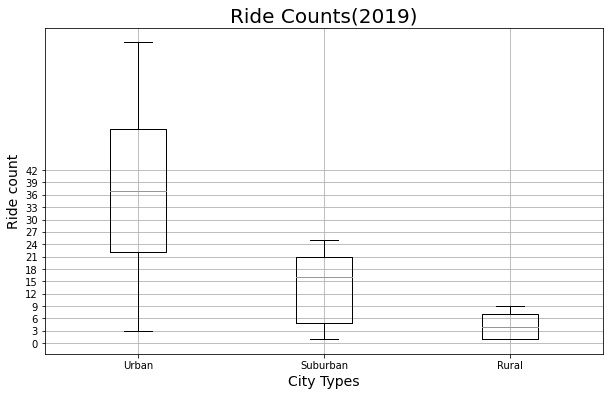

In [54]:
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_cities_df['driver_count'],suburban_cities_df['driver_count'],rural_cities_df['driver_count']]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Counts(2019)',fontsize=20)
ax.set_ylabel('Ride count',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [64]:
total_fare_urban= pyber_data_df['fare'].sum()
total_fare_urban

63538.64

In [63]:
sum_fares_by_type= pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [66]:
#Calculate the percentages 
type_percentages=sum_fares_by_type/total_fare_urban * 100
type_percentages

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

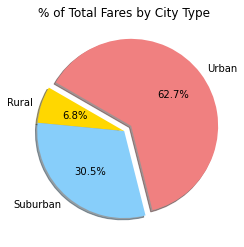

In [69]:
#pie chart with type_percentages as values 
plt.pie(type_percentages,labels=["Rural","Suburban","Urban"],colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()